In [1]:
# %% Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

/opt/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# %% Read CSV
df = pd.read_csv('data.csv', index_col=0, nrows=100)
df.index = np.arange(0, len(df))
willbepredicted = pd.read_csv('data.csv', index_col=0, skiprows=range(1, 101), nrows=20)

feature_cols = ['x1', 'x2', 'x3', 'x4', 'x5']

X = df[feature_cols]
y = df.Y
x_find = willbepredicted[feature_cols]

In [3]:
# %% Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.20, random_state=0)

In [4]:
linreg = LinearRegression()

linreg.fit(X, y)
y_pred = linreg.predict(X)

In [5]:
print("x1: ", linreg.coef_[0])
print("x2: ", linreg.coef_[1])
print("x3: ", linreg.coef_[2])
print("x4: ", linreg.coef_[3])
print("x5: ", linreg.coef_[4])

x1:  -0.14813529290736643
x2:  -32.1007066048948
x3:  82.67435716452609
x4:  0.5973716561125914
x5:  12.214009071344265


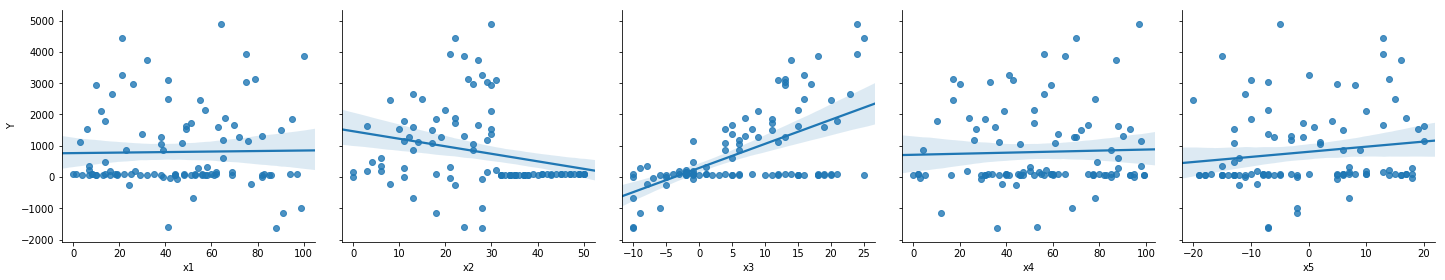

In [6]:
%matplotlib inline
sns.pairplot(df, x_vars=['x1', 'x2', 'x3', 'x4', 'x5'], y_vars='Y', height=4, aspect=1.0, kind='reg')

In [7]:
# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
X.insert(0, "x0", 1)

X_opt = X[['x0', 'x1', 'x2', 'x3', 'x4', 'x5']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     16.47
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.20e-11
Time:                        10:43:37   Log-Likelihood:                -825.21
No. Observations:                 100   AIC:                             1662.
Df Residuals:                      94   BIC:                             1678.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0          1113.1040    349.862      3.182      0.002     418.446    1807.762
x1            -0.1481      3.556     -0.042      0.967      -7.208       6.911
x2           -32.1007      7.468     -4.298      0.000     -46.929     -17.272
x3            82.6744     10.004      8.264      0.000      62.810     102.538
x4             0.5974      3.631      0.165      0.870      -6.612       7.807
x5            12.2140      8.437      1.448      0.151      -4.538      28.966
==============================================================================
Omnibus:                        6.029   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.501
Skew:                           0.555   Prob(JB):                       0.0639
Kurtosis:                       3.298   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### p value of x1 is 0.967 and it's greater than my SL. I've eliminated x1

In [8]:
X_opt = X[['x0', 'x2', 'x3', 'x4', 'x5']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     20.80
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           2.44e-12
Time:                        10:43:37   Log-Likelihood:                -825.21
No. Observations:                 100   AIC:                             1660.
Df Residuals:                      95   BIC:                             1673.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0          1106.7271    312.948      3.536      0.001     485.447    1728.008
x2           -32.0779      7.409     -4.330      0.000     -46.787     -17.369
x3            82.6731      9.952      8.307      0.000      62.916     102.430
x4             0.5788      3.585      0.161      0.872      -6.538       7.696
x5            12.2223      8.390      1.457      0.148      -4.434      28.879
==============================================================================
Omnibus:                        5.964   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                5.432
Skew:                           0.552   Prob(JB):                       0.0661
Kurtosis:                       3.295   Cond. No.                         217.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### x4's p value (0.872) is greater than my SL. I've eliminated x4

In [9]:
X_opt = X[['x0', 'x2', 'x3', 'x5']]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     28.01
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           4.24e-13
Time:                        10:43:37   Log-Likelihood:                -825.22
No. Observations:                 100   AIC:                             1658.
Df Residuals:                      96   BIC:                             1669.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0          1141.8474    223.861      5.101      0.000     697.486    1586.209
x2           -32.2098      7.326     -4.396      0.000     -46.753     -17.667
x3            82.6821      9.901      8.351      0.000      63.029     102.335
x5            12.1522      8.336      1.458      0.148      -4.395      28.700
==============================================================================
Omnibus:                        6.187   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.662
Skew:                           0.562   Prob(JB):                       0.0589
Kurtosis:                       3.310   Cond. No.                         73.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### remaining features' p values are less than my significance level 0.05

In [10]:
feature_cols = [ 'x2', 'x3', 'x5' ]
X_train = df[feature_cols]
y_train = df.Y

X_test = willbepredicted[feature_cols]

linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print(y_pred)

[ 1110.36291321   850.545366    1238.37578502  -403.08248109
  1990.10754432 -1237.67131187   140.48020518   882.78590327
   136.99100333  1781.10677895  2483.61099772  -966.04607179
  -381.43565364   692.77445583    16.23241308  1337.48754781
   284.67917056  2353.1827379    -96.24550126    51.03107948]


#### then I've decided find all the subsets of my data, and compare their rmse values to understand the effects of my features on my model

In [11]:
scores = cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')

# fix the sign of MSE scores
mse_scores = -scores

# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)

# calculate the average RMSE
print("Mean of rmse with all features included: " , rmse_scores.mean())

Mean of rmse with all features included:  1000.0719831858908


#### Let's find rmse for all subsets of our features

[ 'x5' ], [ 'x4' ], [ 'x4', 'x5' ],[ 'x3' ],[ 'x3', 'x5' ],[ 'x3', 'x4' ],[ 'x3', 'x4', 'x5' ],[ 'x2' ],[ 'x2', 'x5' ],[ 'x2', 'x4' ],[ 'x2', 'x4', 'x5' ],[ 'x2', 'x3' ],[ 'x2', 'x3', 'x5' ],[ 'x2', 'x3', 'x4' ],[ 'x2', 'x3', 'x4', 'x5' ],[ 'x1' ],[ 'x1', 'x5' ],[ 'x1', 'x4' ],[ 'x1', 'x4', 'x5' ],[ 'x1', 'x3' ],[ 'x1', 'x3', 'x5' ],[ 'x1', 'x3', 'x4' ],[ 'x1', 'x3', 'x4', 'x5' ],[ 'x1', 'x2' ],[ 'x1', 'x2', 'x5' ],[ 'x1', 'x2', 'x4' ],[ 'x1', 'x2', 'x4', 'x5' ],[ 'x1', 'x2', 'x3' ],[ 'x1', 'x2', 'x3', 'x5' ],[ 'x1', 'x2', 'x3', 'x4' ],[ 'x1', 'x2', 'x3', 'x4', 'x5' ]

In [12]:
feature_cols = [ 'x5' ]
X = df[feature_cols]
print("Mean of rmse [ 'x5' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x4' ]
X = df[feature_cols]
print("Mean of rmse [ 'x4' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x4', 'x5' ]
X = df[feature_cols]
print("Mean of rmse [ 'x4', 'x5' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x3' ]
X = df[feature_cols]
print("Mean of rmse [ 'x3' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x3', 'x5' ]
X = df[feature_cols]
print("Mean of rmse [ 'x3', 'x5' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x3', 'x4' ]
X = df[feature_cols]
print("Mean of rmse [ 'x3', 'x4' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x3', 'x4', 'x5' ]
X = df[feature_cols]
print("Mean of rmse [ 'x3', 'x4', 'x5' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x2' ]
X = df[feature_cols]
print("Mean of rmse [ 'x2' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x2', 'x5' ]
X = df[feature_cols]
print("Mean of rmse [ 'x2', 'x5' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x2', 'x4' ]
X = df[feature_cols]
print("Mean of rmse [ 'x2', 'x4' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x2', 'x4', 'x5' ]
X = df[feature_cols]
print("Mean of rmse [ 'x2', 'x4', 'x5' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x2', 'x3' ]
X = df[feature_cols]
print("Mean of rmse [ 'x2', 'x3' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x2', 'x3', 'x5' ]
X = df[feature_cols]
print("Mean of rmse [ 'x2', 'x3', 'x5' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x2', 'x3', 'x4' ]
X = df[feature_cols]
print("Mean of rmse [ 'x2', 'x3', 'x4' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x2', 'x3', 'x4', 'x5' ]
X = df[feature_cols]
print("Mean of rmse [ 'x2', 'x3', 'x4', 'x5' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1' ]
X = df[feature_cols]
print("Mean of rmse [ 'x1' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1', 'x5' ]
X = df[feature_cols]
print("Mean of rmse [ 'x1', 'x5' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1', 'x4' ]
X = df[feature_cols]
print("Mean of rmse [ 'x1', 'x4' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1', 'x4', 'x5']
X = df[feature_cols]
print("Mean of rmse [ 'x1', 'x4', 'x5']: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1', 'x3' ]
X = df[feature_cols]
print("Mean of rmse [ 'x1', 'x3' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1', 'x3', 'x5' ]
X = df[feature_cols]
print("Mean of rmse [ 'x1', 'x3', 'x5' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1', 'x3', 'x4' ]
X = df[feature_cols]
print("Mean of rmse [ 'x1', 'x3', 'x4' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1', 'x3', 'x4', 'x5' ]
X = df[feature_cols]
print("Mean of rmse [ 'x1', 'x3', 'x4', 'x5' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1', 'x2' ]
X = df[feature_cols]
print("Mean of rmse [ 'x1', 'x2' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1', 'x2', 'x5' ]
X = df[feature_cols]
print("Mean of rmse [ 'x1', 'x2', 'x5' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1', 'x2', 'x4' ]
X = df[feature_cols]
print("Mean of rmse [ 'x1', 'x2', 'x4' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1', 'x2', 'x4', 'x5' ]
X = df[feature_cols]
print("Mean of rmse [ 'x1', 'x2', 'x4', 'x5' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1', 'x2', 'x3' ]
X = df[feature_cols]
print("Mean of rmse [ 'x1', 'x2', 'x3' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1', 'x2', 'x3', 'x5' ]
X = df[feature_cols]
print("Mean of rmse [ 'x1', 'x2', 'x3', 'x5' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1', 'x2', 'x3', 'x4' ]
X = df[feature_cols]
print("Mean of rmse [ 'x1', 'x2', 'x3', 'x4' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

feature_cols = [ 'x1', 'x2', 'x3', 'x4', 'x5' ]
X = df[feature_cols]
print("Mean of rmse [ 'x1', 'x2', 'x3', 'x4', 'x5' ]: ", np.sqrt(-cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

Mean of rmse [ 'x5' ]:  1233.816965091099
Mean of rmse [ 'x4' ]:  1262.2824118519077
Mean of rmse [ 'x4', 'x5' ]:  1254.3868143284667
Mean of rmse [ 'x3' ]:  1044.8402437111006
Mean of rmse [ 'x3', 'x5' ]:  1045.5269498128887
Mean of rmse [ 'x3', 'x4' ]:  1073.407916205778
Mean of rmse [ 'x3', 'x4', 'x5' ]:  1074.0602249108588
Mean of rmse [ 'x2' ]:  1206.1829154024713
Mean of rmse [ 'x2', 'x5' ]:  1198.3669975919577
Mean of rmse [ 'x2', 'x4' ]:  1224.3957612088545
Mean of rmse [ 'x2', 'x4', 'x5' ]:  1216.4591428441017
Mean of rmse [ 'x2', 'x3' ]:  963.3214406915713
Mean of rmse [ 'x2', 'x3', 'x5' ]:  962.5889085840488
Mean of rmse [ 'x2', 'x3', 'x4' ]:  992.1879646685354
Mean of rmse [ 'x2', 'x3', 'x4', 'x5' ]:  991.8323083830168
Mean of rmse [ 'x1' ]:  1252.0266242901002
Mean of rmse [ 'x1', 'x5' ]:  1243.8427178517418
Mean of rmse [ 'x1', 'x4' ]:  1275.1254642411577
Mean of rmse [ 'x1', 'x4', 'x5']:  1266.5025472346201
Mean of rmse [ 'x1', 'x3' ]:  1058.7370593626356
Mean of rmse [ 

#### now y_mlr contains my Multiple Linear Regression predictions

In [13]:
feature_cols = [ 'x2', 'x3', 'x5' ]
X = df[feature_cols]
y = df.Y

X_test = willbepredicted[feature_cols]

linreg.fit(X, y)
y_mlr = linreg.predict(X_test)

#### after that I've tried decision tree regression, random forest regression and lasso method.

In [14]:
X = df[feature_cols]
y = df.Y
x_find = willbepredicted[feature_cols]

# %% Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.20, random_state=0)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
for i in range(1, 7):
    poly_reg = PolynomialFeatures(degree = i)
    X_poly = poly_reg.fit_transform(X)
    X_train_poly = poly_reg.fit_transform(X_train)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)
    pol_scores = np.sqrt(-cross_val_score(lin_reg, X_poly, y, cv = 10, scoring='neg_mean_squared_error'))
    print("mean cross validation score(degree {}): {}".format(i,np.mean(pol_scores)))
    print("RMSE without CV(degree {}): {}".format(i,np.sqrt(np.sum(np.square(y_test - lin_reg.predict(poly_reg.fit_transform(X_test))))/len(X_test))))
    print("")

mean cross validation score(degree 1): 962.5889085840487
RMSE without CV(degree 1): 828.3654902357964

mean cross validation score(degree 2): 929.3727870100718
RMSE without CV(degree 2): 847.7239333513262

mean cross validation score(degree 3): 994.7451650509689
RMSE without CV(degree 3): 771.7619208312487

mean cross validation score(degree 4): 1923.619778983891
RMSE without CV(degree 4): 1171.0306116996853

mean cross validation score(degree 5): 4671.6716115755935
RMSE without CV(degree 5): 4169.884535249694

mean cross validation score(degree 6): 37001.83191438672
RMSE without CV(degree 6): 28568.331650381257



#### RMSE increases after degree 3, so I choose degree 3 for my polynomial model

In [16]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pol = lin_reg.predict(poly_reg.fit_transform(x_find))

In [17]:
# %% Decision Tree Regressor Model
dt = DecisionTreeRegressor(random_state=0, criterion="mse")
dt_fit = dt.fit(X_train, y_train)

# dt_scores now consist RMSE
dt_scores = np.sqrt(-cross_val_score(dt_fit, X, y, cv = 10, scoring='neg_mean_squared_error'))
print("mean cross validation score: {}".format(np.mean(dt_scores)))

# RMSE without cross-validation
print("score without cv: {}".format(np.sqrt(np.sum(np.square(y_test - dt_fit.predict(X_test)))/len(X_test))))

# GridSearchCV

from sklearn.metrics import mean_squared_error
scoring = make_scorer(mean_squared_error)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=10, refit=True)

g_cv.fit(X_train, y_train)
g_cv.best_params_

result = g_cv.cv_results_

# RMSE of GridSearchCV
print("RMSE of best estimator: {}".format(np.sqrt(np.sum(np.square(y_test - g_cv.best_estimator_.predict(X_test)))/len(X_test))))

# fit all data before prediction
g_cv.fit(X, y)
# Prediction of last 20 row by Decision Tree Regressor Model
y_dtr = g_cv.best_estimator_.predict(x_find)

mean cross validation score: 547.5454703092869
score without cv: 853.5270353070254
RMSE of best estimator: 853.5270353070254


In [18]:
# %% Random Forest Regression

rfr = RandomForestRegressor(random_state=0, criterion="mse")
rfr_fit = rfr.fit(X_train, y_train)

# rfr_scores now consist RMSE
rfr_scores = np.sqrt(-cross_val_score(rfr_fit, X, y, cv = 10, scoring='neg_mean_squared_error'))
print("mean cross validation score: {}".format(np.mean(rfr_scores)))

# RMSE without cross-validation
print("score without cv: {}".format(np.sqrt(np.sum(np.square(y_test - rfr_fit.predict(X_test)))/len(X_test))))

# RMSE of GridSearchCV
from sklearn.metrics import mean_squared_error
param_grid = {
    'n_estimators': [1000]
}

scoring = make_scorer(mean_squared_error)
g_cv = GridSearchCV(RandomForestRegressor(random_state=0),
              param_grid=param_grid,
              scoring=scoring, cv=10, refit=True)

g_cv.fit(X_train, y_train)
g_cv.best_params_

result = g_cv.cv_results_
# print(result)
print("RMSE of best estimator: {}".format(np.sqrt(np.sum(np.square(y_test - g_cv.best_estimator_.predict(X_test)))/len(X_test))))
# fit all data before prediction
g_cv.fit(X, y)
y_rfr = g_cv.best_estimator_.predict(x_find)

mean cross validation score: 497.7086291841295
score without cv: 572.635035166379
RMSE of best estimator: 585.0795790109667


In [19]:
# %% Lasso

from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0).fit(X_train, y_train)

lasso_scores = np.sqrt(-cross_val_score(reg, X, y, cv = 10, scoring='neg_mean_squared_error'))
print("mean cross validation score: {}".format(np.mean(lasso_scores)))

# RMSE without cross-validation
print("score without cv: {}".format(np.sqrt(np.sum(np.square(y_test - reg.predict(X_test)))/len(X_test))))
# fit all data before prediction
reg.fit(X, y)
y_lasso = reg.predict(x_find)

mean cross validation score: 962.9765376122477
score without cv: 828.0371207159719
